In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("car-price.data", names=cols)

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## **Data Cleaning**

- feature columns --> wheel-base, length, width, height, curb-weight, num-of-cylinders, engine-size, horsepower, peak-rpm, city-mpg, highway-mpg- 
target column --> pric

Since, normalized losses and other columns contain null values in the form of ? we need to replace these values.e

In [6]:
cars.replace('?', np.nan, inplace=True)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
def cylinder_count(val):
    if val == 'four':
        return 4
    elif val == 'six':
        return 6
    elif val == 'five':
        return 5
    elif val == 'three':
        return 3
    elif val == 'twelve':
        return 12
    elif val == 'two':
        return 2
    elif val == 'eight':
        return 8

In [10]:
cars['num-of-cylinders'] = cars['num-of-cylinders'].apply(cylinder_count).astype(int)

In [11]:
numeric_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_values_cols]

In [12]:
numeric_cars = numeric_cars.astype(float)

In [13]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [14]:
# Since, price is the target column we don't need rows with missing price, we can drop those rows.
numeric_cars.dropna(subset=['price'], inplace=True)

In [15]:
mean_losses = np.mean(numeric_cars[numeric_cars['normalized-losses'].notnull()]['normalized-losses'])

In [16]:
# normalized losses column contains the most missing values (ie-37),
# so we need to fill these values, we will fill them with the mean.
numeric_cars['normalized-losses'].fillna(value=mean_losses, inplace=True)

In [17]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               197 non-null    float64
 8   stroke             197 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         199 non-null    float64
 11  peak-rpm           199 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


In [18]:
numeric_cars.fillna(numeric_cars.mean(), inplace=True)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         201 non-null    float64
 11  peak-rpm           201 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


In [19]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [20]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# **Univariate k-nearest neighbors models**

In [21]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature_col, target_col, df):
    knn = KNeighborsRegressor(n_neighbors=5)
    end_pt = round(len(df)/2)
    train_df = df.iloc[:end_pt]
    test_df = df.iloc[end_pt:]
    knn.fit(train_df[[feature_col]], train_df[target_col])
    predictions = knn.predict(test_df[[feature_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**0.5
    return rmse

In [23]:
cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
rmse_list = []
for col in cols:
    rmse_list.append(knn_train_test(col, 'price', numeric_cars))
    
feature_rmse = pd.Series(index = cols, data = rmse_list)

In [24]:
feature_rmse

normalized-losses     8253.454114
wheel-base            9826.306575
length                8374.353066
width                 6887.047156
height               10985.872732
curb-weight           5167.360978
engine-size           4316.152192
bore                 13543.588377
stroke               10751.215714
compression-rate      8714.929419
horsepower            4286.593963
peak-rpm             10387.965997
city-mpg              4805.479894
highway-mpg           4065.651028
dtype: float64

In [25]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

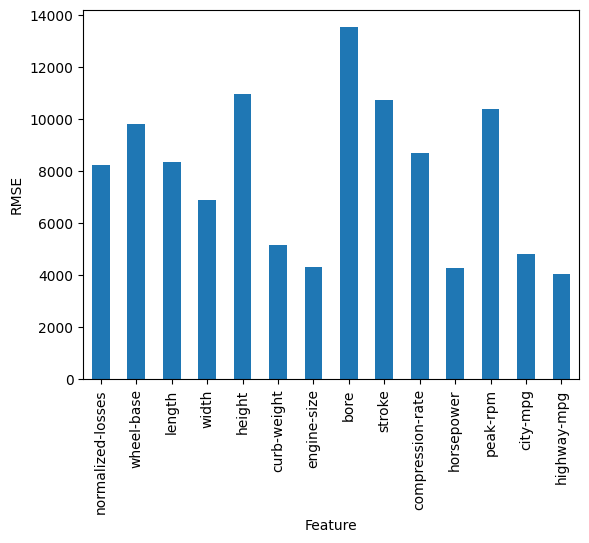

In [28]:
%matplotlib inline
feature_rmse.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('RMSE')
plt.show()

In [29]:
# the same function but with k value parameter
def knn_train_test_k(feature_col, target_col, df, k_val):
    knn = KNeighborsRegressor(n_neighbors=k_val)
    end_pt = round(len(df)/2)
    train_df = df.iloc[:end_pt]
    test_df = df.iloc[end_pt:]
    
    knn.fit(train_df[[feature_col]], train_df[target_col])
    predictions = knn.predict(test_df[[feature_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**0.5
    return rmse

In [30]:
rmse_dict = {}
for col in cols:
    k_dict = {}
    for i in range(1, 10, 2):
        rmse_val = knn_train_test_k(col, 'price', numeric_cars, i)
        k_dict[i] = rmse_val
    rmse_dict[col] = k_dict

rmse_dict

{'normalized-losses': {1: 9231.877408477028,
  3: 9530.042470212209,
  5: 8253.454114334541,
  7: 7624.170902272588,
  9: 7915.407534894623},
 'wheel-base': {1: 8367.568719008332,
  3: 9615.019076048851,
  5: 9826.306575214263,
  7: 9067.726290811148,
  9: 8623.998003867615},
 'length': {1: 10792.870832266093,
  3: 8525.294165051437,
  5: 8374.353066120368,
  7: 8385.430687671384,
  9: 7650.8561591800635},
 'width': {1: 8128.726248056431,
  3: 7358.7651369665355,
  5: 6887.047156326528,
  7: 6715.128595022317,
  9: 6513.940660226193},
 'height': {1: 15478.999822180034,
  3: 11114.422683399194,
  5: 10985.872731849573,
  7: 10097.624595057976,
  9: 9093.756287144182},
 'curb-weight': {1: 6576.654287239173,
  3: 5636.668605585832,
  5: 5167.360977528007,
  7: 5244.687502529751,
  9: 5240.0877200925515},
 'engine-size': {1: 5059.805426149809,
  3: 4686.640113253322,
  5: 4316.152192097324,
  7: 4207.9531498167535,
  9: 4009.517713037623},
 'bore': {1: 15104.12253572704,
  3: 14404.2015819

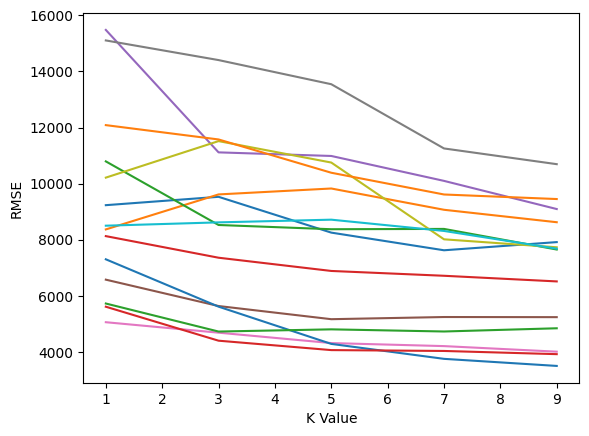

In [31]:
%matplotlib inline

for k, v in rmse_dict.items():
    x = [i for i in range(1, 10, 2)]
    y = []
    for i in x:
        y.append(v[i])
    
    plt.plot(x, y)
    plt.xlabel('K Value')
    plt.ylabel('RMSE')

## **Multivariate k-nearest neighbors models**

In [32]:
feature_rmse.sort_values(ascending=True).head(5)  # the results of the previous run(univariate model)

highway-mpg    4065.651028
horsepower     4286.593963
engine-size    4316.152192
city-mpg       4805.479894
curb-weight    5167.360978
dtype: float64

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# this function can now accept multiple feature values
def knn_train_test(feature_cols, target_col, df, k_val):
    # feature_cols is a list
    knn = KNeighborsRegressor(n_neighbors=k_val)
    end_pt = round(len(df)/2)
    train_df = df.iloc[:end_pt]
    test_df = df.iloc[end_pt:]
    knn.fit(train_df[feature_cols], train_df[target_col])
    predictions = knn.predict(test_df[feature_cols])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**0.5
    return rmse

In [34]:
features = ['engine-size', 'horsepower', 'highway-mpg', 'city-mpg',
            'curb-weight']
feature_used = []
rmse_dict = {}
for i in range(5):
    feature_used.append(features[i])
    rmse_val = knn_train_test(feature_used, 'price', numeric_cars, 5)
    rmse_dict[str(feature_used)] = rmse_val

In [35]:
for k, v in rmse_dict.items():
    print(k)
    print(v)
    print('-'*10)

['engine-size']
4316.152192097324
----------
['engine-size', 'horsepower']
3465.342388695681
----------
['engine-size', 'horsepower', 'highway-mpg']
3573.993044533836
----------
['engine-size', 'horsepower', 'highway-mpg', 'city-mpg']
3540.6241552462006
----------
['engine-size', 'horsepower', 'highway-mpg', 'city-mpg', 'curb-weight']
3880.1932327099785
----------


## **Hyperparameter Tuning**

From the previous model the top 3 were the ones with the following features :-

- ['engine-size', 'horsepower']- 
['engine-size', 'horsepower', 'highway-mpg', 'city-mpg']
- 
['engine-size', 'horsepower', 'highway-mpg

We will now vary the hyperparameter(n-neighbors) from 1 to 25 to find the optimum value for each of the three models.']

#### **MODEL-1**

In [36]:
features = ['engine-size', 'horsepower']
rmse_dict_1 = {}
for i in range(1, 26):
    rmse_val = knn_train_test(features, 'price', numeric_cars, i)
    rmse_dict_1[i] = rmse_val

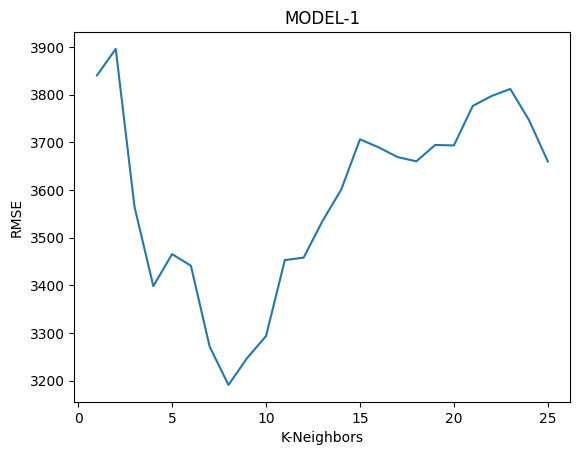

In [37]:
pd.Series(rmse_dict_1).plot()
plt.xlabel('K-Neighbors')
plt.ylabel('RMSE')
plt.title('MODEL-1')
test = plt.show()

#### **MODEL-2**

In [38]:
features = ['engine-size', 'horsepower', 'highway-mpg', 'city-mpg']
rmse_dict_2 = {}
for i in range(1, 26):
    rmse_val = knn_train_test(features, 'price', numeric_cars, i)
    rmse_dict_2[i] = rmse_val

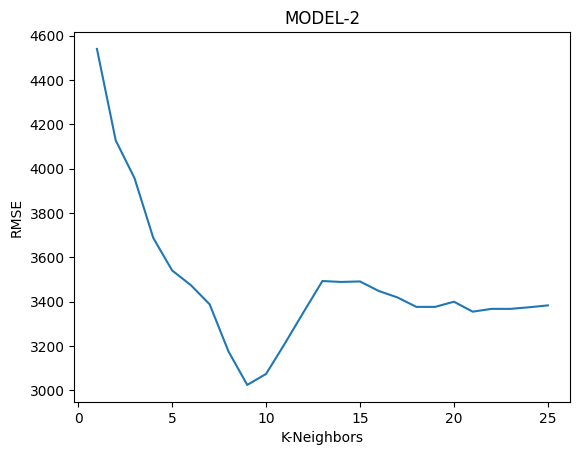

In [39]:
pd.Series(rmse_dict_2).plot()
plt.xlabel('K-Neighbors')
plt.ylabel('RMSE')
plt.title('MODEL-2')
plt.show()


#### **MODEL-3**

In [40]:
features = ['engine-size', 'horsepower', 'highway-mpg']
rmse_dict_3 = {}
for i in range(1, 26):
    rmse_val = knn_train_test(features, 'price', numeric_cars, i)
    rmse_dict_3[i] = rmse_val

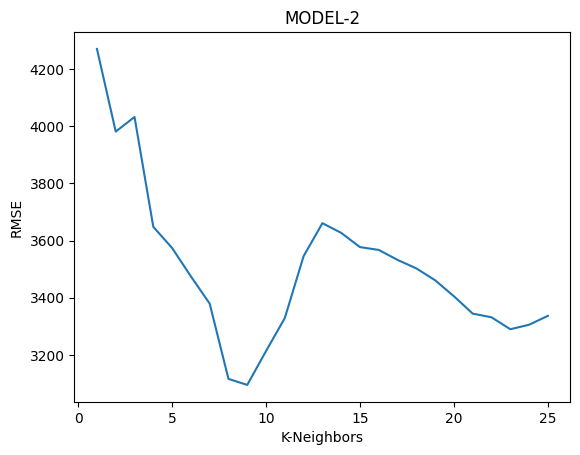

In [41]:
pd.Series(rmse_dict_3).plot()
plt.xlabel('K-Neighbors')
plt.ylabel('RMSE')
plt.title('MODEL-2')
plt.show()

From the above three graphs we can see that k value of 9 returned the least rmse for the all the three models so k value of 9 should be used.